<h3><b>Convolution Neural Network(CNN)</b></h3>

1. First layer: Convolutional (Filters/ Kernels -> Features Detections).
2. Second layer: ReLU (Activation Function -> Removing negative values).
3. Third layer: Pooling (Dimension Reduction)

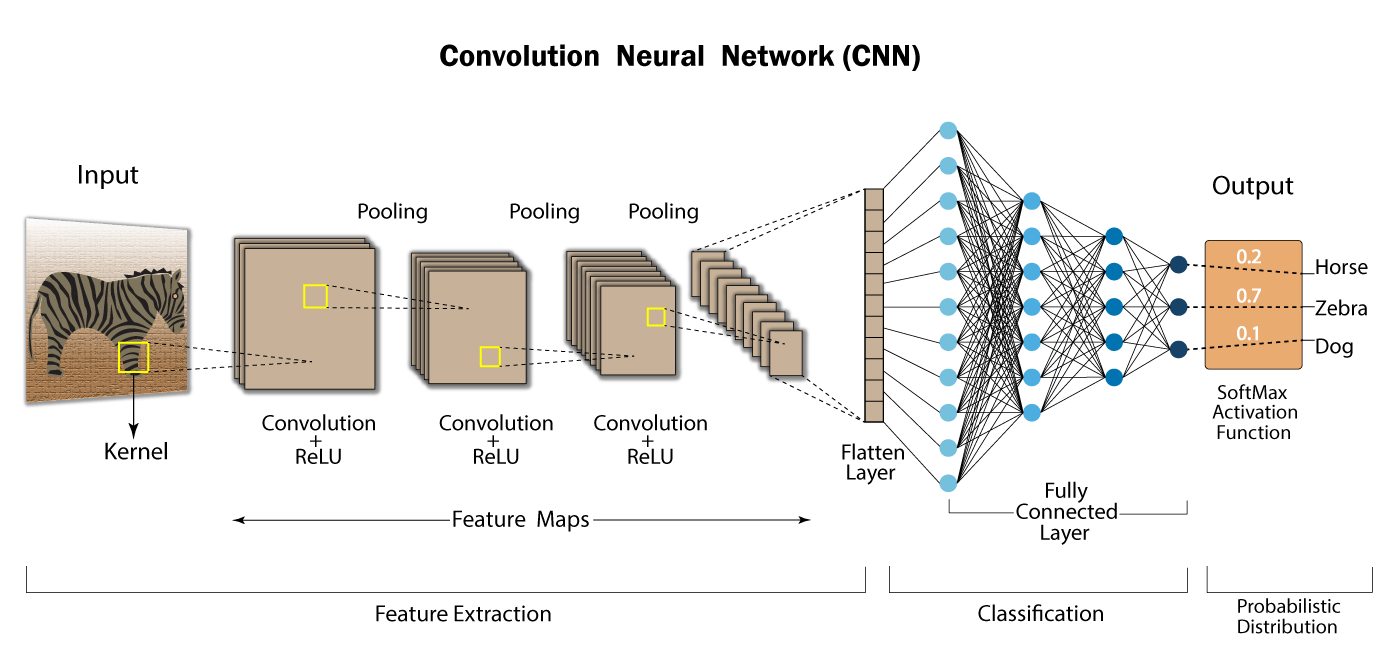
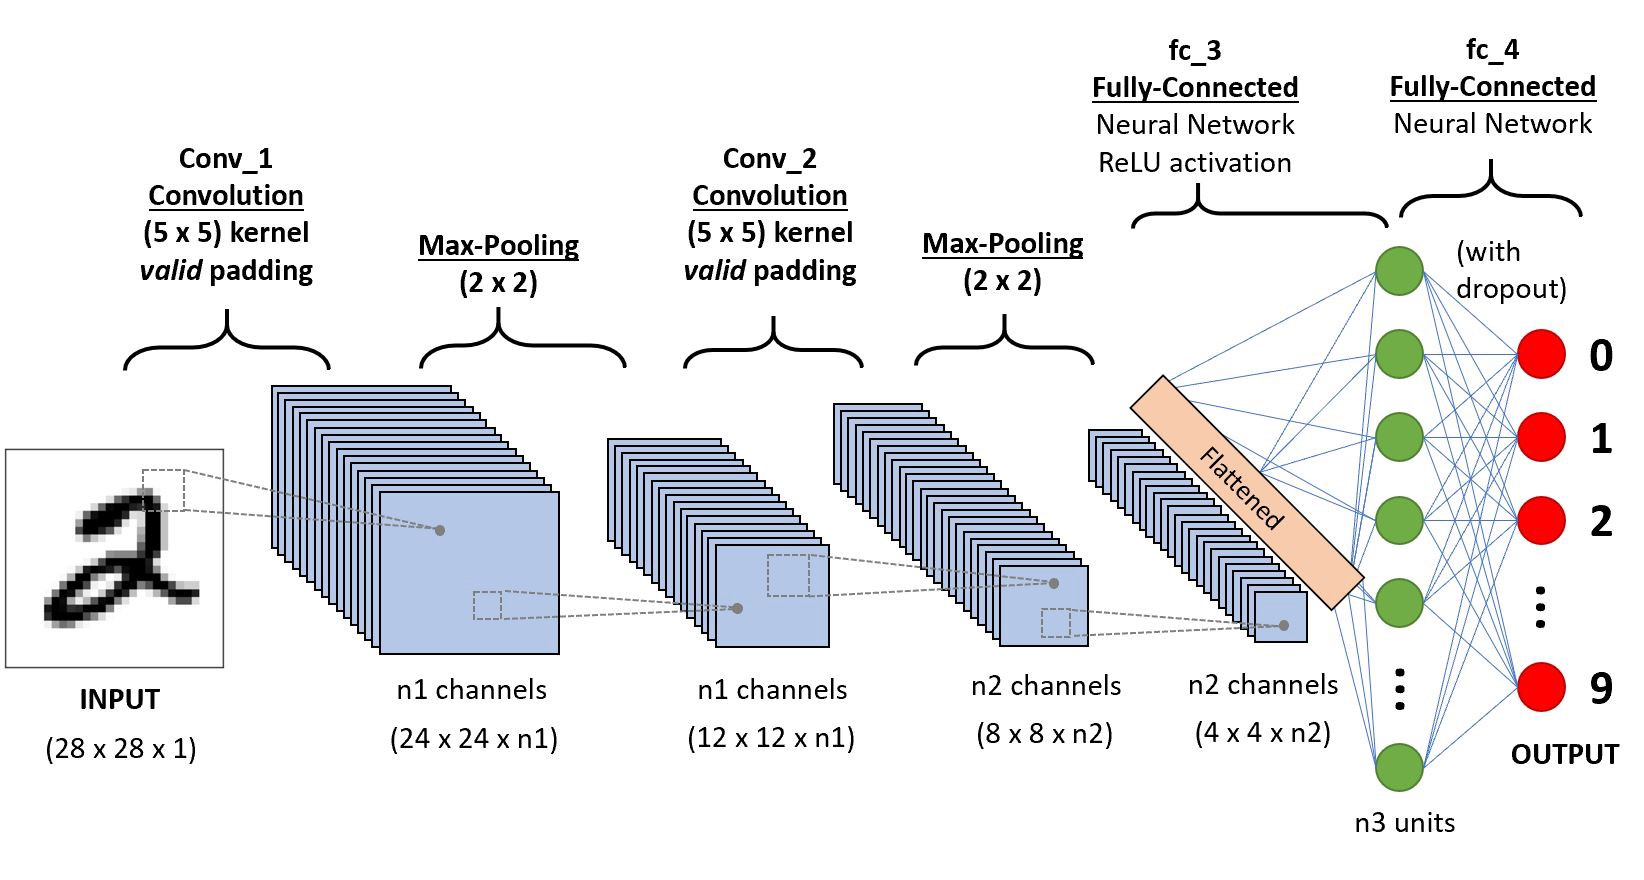

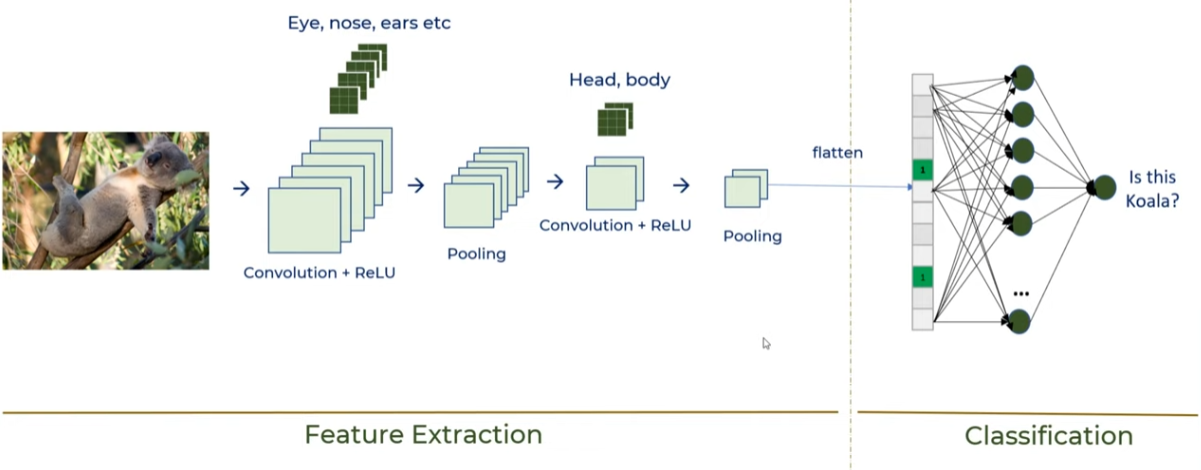

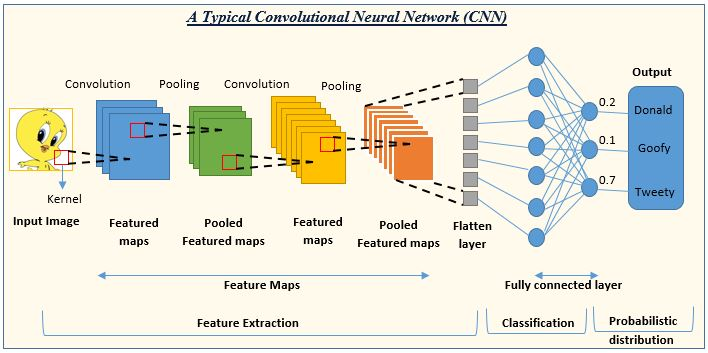

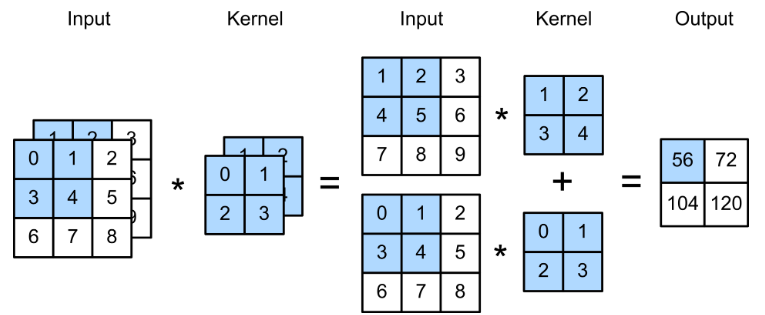

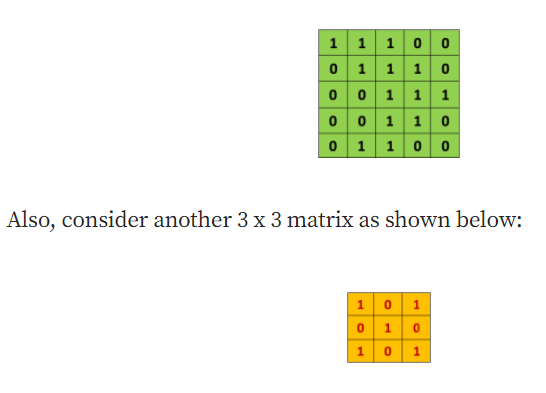

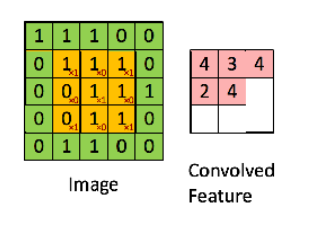

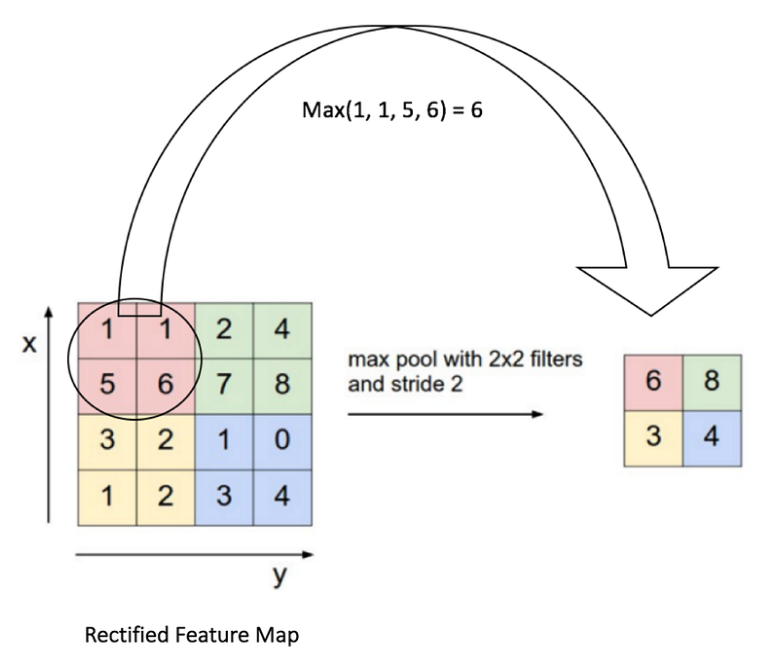

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

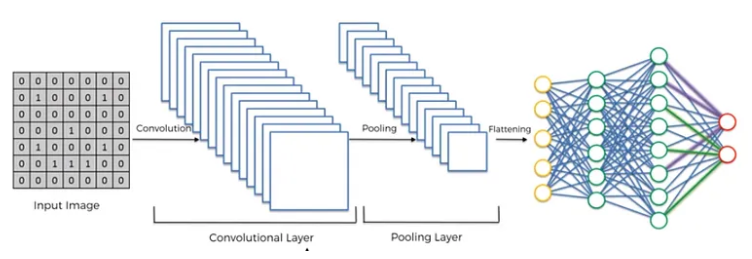

In [5]:
image_width = 64  # Width of an image
image_height = 64 # Height of an image
batch_size = 16    # Size of batch
number_of_channels = 3 # RGB

training_data_directory = "training_data" # Path to training directory.
validation_data_directory = "validation_data" # Path to validation directory.

In [6]:
training_image_data_generator = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)
validation_image_data_generator = ImageDataGenerator(
   rescale=1.0/255
)

traning_data_gen = training_image_data_generator.flow_from_directory(
    training_data_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_data_gen = validation_image_data_generator.flow_from_directory(
    validation_data_directory,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 300 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [7]:
labels = {value: key for key, value in traning_data_gen.class_indices.items()}

print("Classes: ")
for key, value in labels.items():
    print(f"{key} : {value}")


traning_data_gen.classes

print(labels)

Classes: 
0 : circle
1 : elipse
2 : rectangle
3 : square
4 : triangle
{0: 'circle', 1: 'elipse', 2: 'rectangle', 3: 'square', 4: 'triangle'}


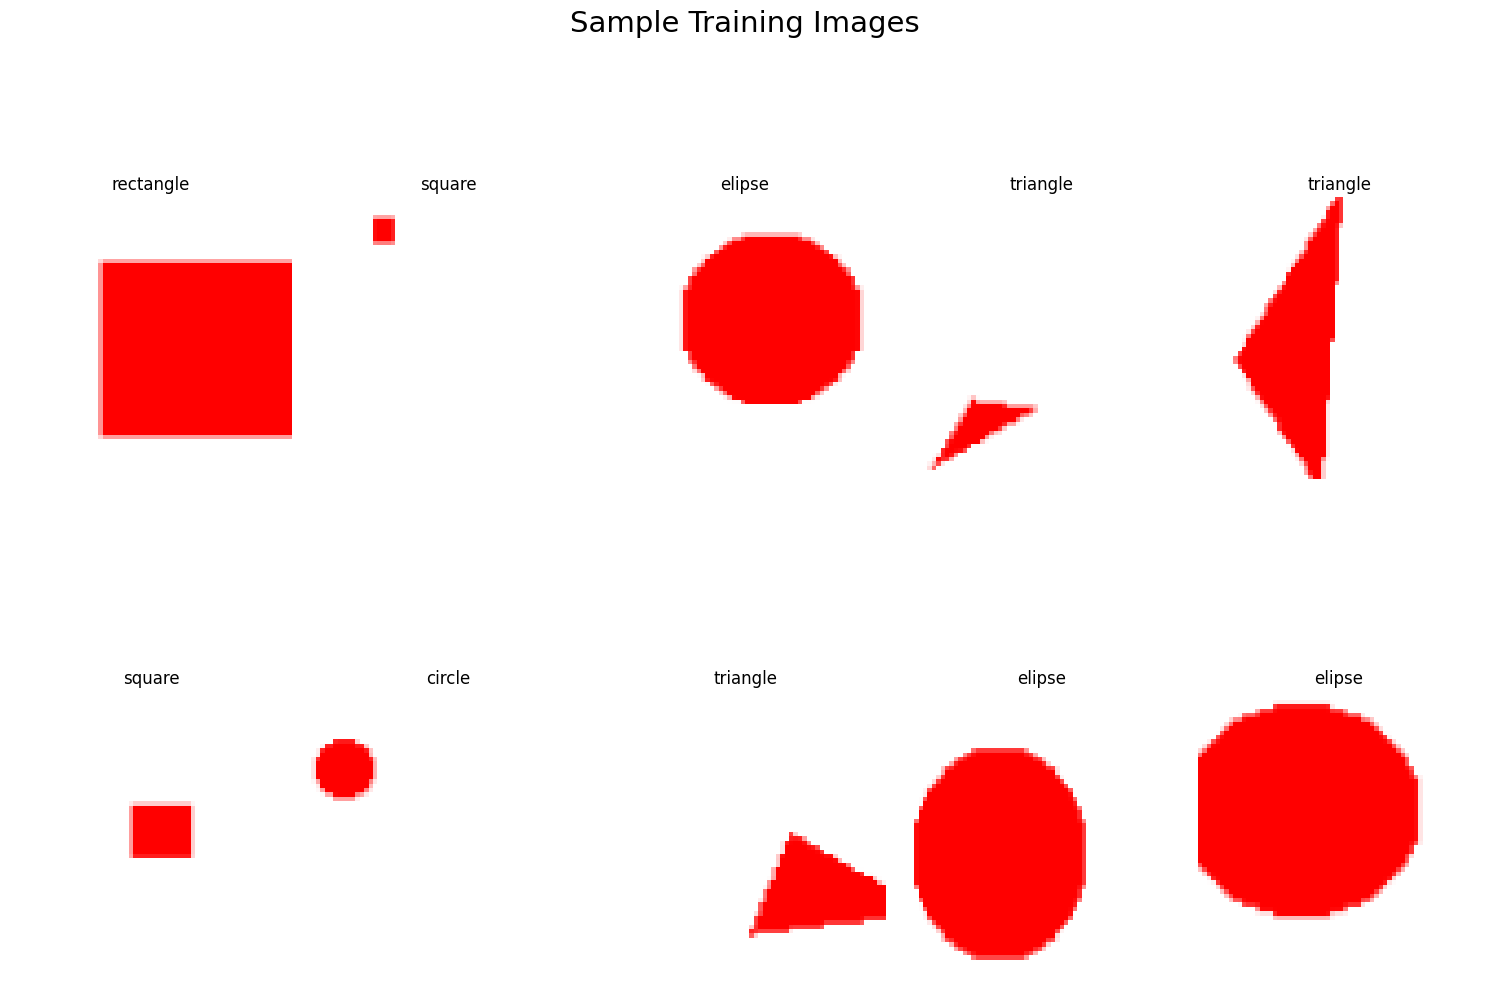

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(traning_data_gen[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(traning_data_gen[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx+=1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [9]:
cnn_model = Sequential()

# FIRST LAYER
cnn_model.add(Convolution2D(
    filters=128,
    kernel_size=(5, 5),
    padding="valid",
    input_shape=(image_width, image_height, number_of_channels)
))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

# SECOND LAYER
cnn_model.add(Convolution2D(
    filters=64,
    kernel_size=(3, 3),
    padding='valid',
    kernel_regularizer=l2(0.00005)
))
cnn_model.add(Activation(activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

# THIRD LAYER
cnn_model.add(Convolution2D(
    filters=32,
    kernel_size=(3, 3),
    padding='valid',
    kernel_regularizer=l2(0.00005)
))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Flatten())
cnn_model.add(Dense(units=256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=5, activation='softmax'))

In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 128)       9728      
                                                                 
 activation (Activation)     (None, 60, 60, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 30, 30, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0

In [11]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=np.sqrt(0.1),
    patience=5
)

optimizer = Adam(learning_rate=0.001)

cnn_model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
history = cnn_model.fit(
    traning_data_gen,
    epochs=150,
    verbose=2,
    validation_data=validation_data_gen,
    callbacks=[reduce_lr]
)

Epoch 1/150
19/19 - 4s - loss: 1.9953 - accuracy: 0.3733 - val_loss: 3.6168 - val_accuracy: 0.2000 - lr: 0.0010 - 4s/epoch - 205ms/step
Epoch 2/150


KeyboardInterrupt: 

In [ ]:
testing_data_directory = validation_data_directory

testing_image_data_generator = ImageDataGenerator(
    rescale=1.0/255
)

testing_data_gen = testing_image_data_generator.flow_from_directory(
    testing_data_directory,
    target_size=(image_width, image_height),
    shuffle=False,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 200 images belonging to 5 classes.


In [ ]:
predictions = cnn_model.predict(
    testing_data_gen
)

13/13 [==============================] - 0s 26ms/step


In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(
    testing_data_gen, batch_size=batch_size
)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

13/13 [==============================] - 0s 26ms/step - loss: 0.2377 - accuracy: 0.9300
Test loss: 0.2377367913722992
Test accuracy: 0.9300000071525574


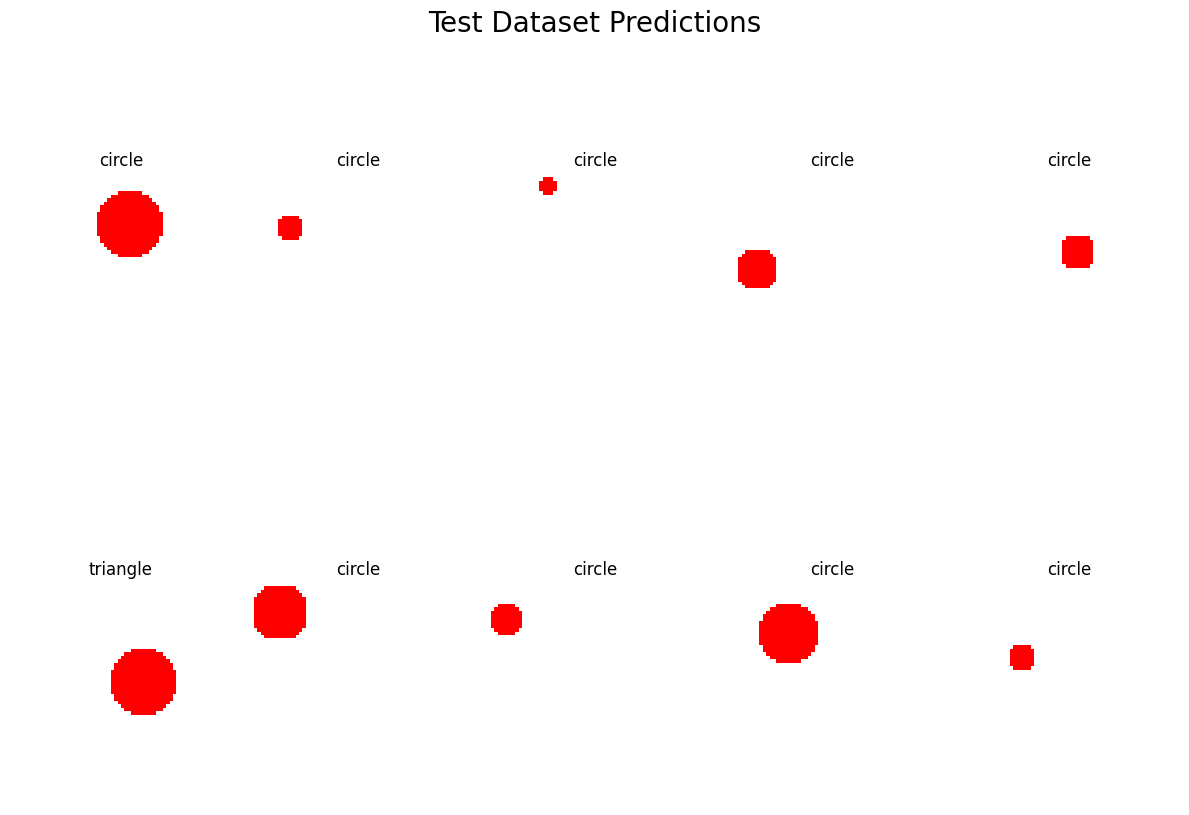

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(testing_data_gen[0][0][idx])
        ax[i, j].axis("off")
        idx+=1
        
plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

<h3><b style="color: red">Saving model:</b></h3>

In [ ]:
# SAVING MODEL

#cnn_model.save_weights("cnn_model_weigths.h5")
#cnn_model.save("cnn_model.keras")

<h3><b style="color: cyan">Loading and testing model:</b></h3>

In [24]:
from keras.models import load_model
from keras.preprocessing.image import load_img

# 1. LOADING Convolutional Neural Network Model:
cnn_model = load_model('cnn_model.keras')

# 2. LOADING SQUARE
image = load_img("./validation_data/square/square61.png", target_size=(64, 64))
img = np.array(image)
img = img / 255.0
img = img.reshape(1, 64, 64, 3)

output_label = cnn_model.predict(img)
print(f"Object: {labels[np.argmax(output_label)]}")

# 3. LOADING CIRCLE
image = load_img("./validation_data/circle/circle62.png", target_size=(64, 64))
img = np.array(image)
img = img / 255.0
img = img.reshape(1, 64, 64, 3)

output_label = cnn_model.predict(img)
print(f"Object: {labels[np.argmax(output_label)]}")


# 4. LOADING TRIANGLE
image = load_img("./validation_data/triangle/triangle60.png", target_size=(64, 64))
img = np.array(image)
img = img / 255.0
img = img.reshape(1, 64, 64, 3)

output_label = cnn_model.predict(img)
print(f"Object: {labels[np.argmax(output_label)]}")

# 5. LOADING ELLIPSE
image = load_img("./validation_data/ellipse/ellipse60.png", target_size=(64, 64))
img = np.array(image)
img = img / 255.0
img = img.reshape(1, 64, 64, 3)

output_label = cnn_model.predict(img)
print(f"Object: {labels[np.argmax(output_label)]}")

1/1 [==============================] - 0s 102ms/step
Object: square
1/1 [==============================] - 0s 23ms/step
Object: circle
1/1 [==============================] - 0s 23ms/step
Object: triangle
1/1 [==============================] - 0s 23ms/step
Object: elipse
